In [2]:
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import konlpy
import numpy as np
import random
import time 
import re
import pickle
driver = webdriver.Chrome(r"..\class\lecture\06\notebook\chromedriver.exe")

In [ ]:
# 인스타그램 접속하기
driver.get("https://www.instagram.com/explore/tags/결혼기념일")

#로딩하는데 시간이 걸릴 수 있으므로 3초간 대기
time.sleep(3)

In [ ]:
ID = "01092298455" #본인 아이디
PW = "tenderr0K@" #본인 비밀번호
# 인스타계정으로 로그인
login_id = driver.find_element_by_name('username')
login_id.send_keys(ID)
login_pw = driver.find_element_by_name('password')
login_pw.send_keys(PW)
login_pw.send_keys(Keys.RETURN)
time.sleep(random.uniform(2,4))

#로그인정보 저장 나중에하기
xpath1 = '//*[@id="react-root"]/section/main/div/div/div/div/button'
driver.find_element_by_xpath(xpath1).click()

time.sleep(random.uniform(2,4))

#알림설정 나중에하기
xpath4 = '/html/body/div[4]/div/div/div/div[3]/button[2]'
driver.find_element_by_xpath(xpath4).click()

In [ ]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [ ]:
word = '어버이날선물'
url = searching(word)
driver.get(url)
time.sleep(4)

In [ ]:
def click_first(driver):
    first = driver.find_element_by_css_selector('#react-root > section > main > article > div:nth-child(3) > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0')
    first.click()
    time.sleep(random.uniform(2,4))
click_first(driver)

In [ ]:
def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

In [ ]:
def next_page(driver):
    next_page = driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow')
    next_page.click()
    time.sleep(random.uniform(2,4))
next_page(driver)

In [ ]:
word = "어버이날선물"   #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result1 = [ ]


# 여러 게시글 수집하기
target = 300      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result1.append(data)
        next_page(driver)
    except:
        time.sleep(3)
        next_page(driver)

In [ ]:
result1 = pd.DataFrame(result1)
result1

In [ ]:
word = "부모님선물"   #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result2 = [ ]


# 여러 게시글 수집하기
target = 300      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result2.append(data)
        next_page(driver)
    except:
        time.sleep(3)
        next_page(driver)

In [ ]:
result2 = pd.DataFrame(result2)
result2

In [ ]:
word = "어버이날선물추천"   #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result3 = [ ]


# 여러 게시글 수집하기
target = 300      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result3.append(data)
        next_page(driver)
    except:
        time.sleep(3)
        next_page(driver)

In [ ]:
result3 = pd.DataFrame(result3)
result3

In [ ]:
df = pd.DataFrame([])
df = pd.concat([df,result1])
df = pd.concat([df,result2])
df = pd.concat([df,result3])

In [ ]:
df.columns = ['본문','시간','좋아요','위치','해쉬태그']

In [ ]:
df.drop_duplicates(subset = ['본문'] , inplace = True)
df=df.reset_index(drop=True)

In [4]:
ls_main = []
for i in df['본문']:
    ls_main.append(i)

ls_main

['레터링 풍선 창업반선생님의 작품입니다.❣❣❣@wooju_byulgb고생하셨어요 ㅜㅜ👍별도에 공방작업실이없어도 홈에서도 주문제작.판매까지 거뜬하게 하실수있는 최고의장점이 있는 풍선창업 매력이 있는 최고의 클래스인거같아요~^^선생님 수고하셨습니다😍ᆞᆞᆞ@5가지종류풍선+꽃버블풍선@레터링 작업(창업에 도움되는모든노하우대방출🎈) ☆원하는 색상ㆍ문구제작가능☆문의는 카톡.☎️(전화) 주시면  빠른상담 해드릴께요(DM답변은 느려요)☆천안ㆍ아산 픽업가능(배송은 배송비  별도)☆10흘 이상 체공유지 🌈레터링 풍선🌈커스텀 풍선🌈꽃풍선 창업🌈기념일 풍선 🌈헬륨 풍선  24.18인치🌈꽃 풍선 18.12인치🌈용돈풍선🌈특수재질풍선🌈1:1 수업🌈체공이 오래 유지될수있는 노하우👍ᆞᆞᆞᆞ#꽃풍선창업#레터링풍선#꽃풍선#커스텀풍선#천안풍선창업#용돈풍선#천안커스텀풍선#아산커스텀풍선#천안꽃풍선창업#아산꽃풍선창업#천안레터링풍선#천안이벤트풍선#이벤트풍선#천안용돈박스#아산용돈박스#어버이날선물#어린이날#조화꽃풍선#투명풍선#풍선잘하는집#천안캔들공방#천안석고방향제 #천안천연비누#일상#천안맘#아산맘',
 '-도라지의 새로운 맛을 깨닫다.⠀• 도라지정과• 도

In [5]:
no_meaning = "검색|포장|진행|링크|공구|환갑|추석|부모님|선물|추천|어버이날|명절|주문|판매|일상|기념일|클래스|이벤트|구매|결혼|박스|스승의날"
no_meaning += "|세트|배송|가능|생일|생신|어버이날선물|제작|디자인|엄마|문의|프로필|시간|설날|준비|특별|예약|꽃바구니"
my_text_clean = []
for a_line in ls_main:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,#]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('[a-zA-Z]',' ',a_line)       # 영문 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line) 
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.

    my_text_clean += [a_line]

In [6]:
my_text_clean

['레터링 풍선 창업반선생님의 작품입니다 ❣❣❣@ _ 고생하셨어요 ㅜㅜ👍별도에 공방작업실이없어도 홈에서도 까지 거뜬하게 하실수있는 최고의장점이 있는 풍선창업 매력이 있는 최고의 인거같아요 ^^선생님 수고하셨습니다😍ᆞᆞᆞ@ 가지종류풍선+꽃버블풍선@레터링 작업 창업에 도움되는모든노하우대방출🎈 ☆원하는 색상ㆍ문구제작가능☆문의는 카톡 ☎️ 전화 주시면 빠른상담 해드릴께요 답변은 느려요 ☆천안ㆍ아산 픽업가능 배송은 배송비 별도 ☆ 흘 이상 체공유지 🌈레터링 풍선🌈커스텀 풍선🌈꽃풍선 창업🌈기념일 풍선 🌈헬륨 풍선 인치🌈꽃 풍선 인치🌈용돈풍선🌈특수재질풍선🌈 : 수업🌈체공이 오래 유지될수있는 노하우👍ᆞᆞᆞᆞ 꽃풍선창업 레터링풍선 꽃풍선 커스텀풍선 천안풍선창업 용돈풍선 천안커스텀풍선 아산커스텀풍선 천안꽃풍선창업 아산꽃풍선창업 천안레터링풍선 천안이벤트풍선 이벤트풍선 천안용돈박스 아산용돈박스 어버이날선물 어린이날 조화꽃풍선 투명풍선 풍선잘하는집 천안캔들공방 천안석고방향제 천안천연비누 일상 천안맘 아산맘',
 ' 도라지의 새로운 맛을 깨닫다 ⠀• 도라지정과• 도감각수제카라멜• 배도라지대추생강고⠀⠀⠀⠀ 도감각 도라지ᄌ

In [7]:
hannanum = konlpy.tag.Hannanum()

In [8]:
# 명사 추출.
my_words = []
for a_line in my_text_clean:
    my_words += hannanum.nouns(a_line)

In [9]:
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [10]:
my_series = pd.Series(my_words_2)

In [11]:
my_word_counts = my_series.value_counts().sort_values(ascending=False)

In [12]:
a_long_sentence = ' '.join(my_words_2)

In [13]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)

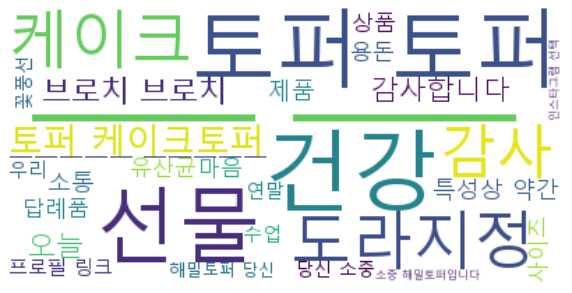

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

C:\Users\ROKA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ROKA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10240 missing from current font.
  font.set_text(s, 0, flags=flags)


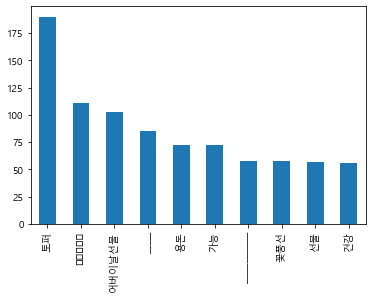

In [15]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

counts_bar = my_word_counts[:10]
counts_bar.plot(kind="bar")
plt.show()

In [16]:
my_word_counts[:31]

토퍼          190
⠀⠀⠀⠀⠀       111
어버이날선물      103
_____        85
용돈           72
가능           72
—————        58
꽃풍선          58
선물           57
건강           56
답례품          55
브로치          55
풍선           53
어버이날선물추천     53
홍삼           52
케이크          52
마음           52
공구           48
주문           48
사용           47
도라지정         47
감사           46
해밀토퍼         46
프로필          45
박스           44
도안           43
아빠           43
부모님선물        43
카카오톡         43
제품           42
케이크토퍼        42
dtype: int64

In [ ]:
df.to_pickle("df.pkl")